# 06. Matplotlib 기초 - 실습 문제

## 실습 안내
- 총 8개 문제
- Matplotlib 기본 차트 연습
- 스타일링과 커스터마이징 연습

## 환경 설정 및 데이터 로드

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from koreanize_matplotlib import koreanize
koreanize()
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 6)

# 데이터 로드
production_df = pd.read_csv('../data/05_production.csv', encoding='utf-8-sig')
quality_df = pd.read_csv('../data/07_quality_inspection.csv', encoding='utf-8-sig', na_values=['\\N'])
equipment_df = pd.read_csv('../data/01_equipment.csv', encoding='utf-8-sig')

# 날짜 변환
production_df['production_date'] = pd.to_datetime(production_df['production_date'])
quality_df['inspection_time'] = pd.to_datetime(quality_df['inspection_time'])

# 불량률 계산
production_df['defect_rate'] = (production_df['defect_quantity'] / production_df['actual_quantity'] * 100).round(2)

print("데이터 로드 완료!")

데이터 로드 완료!


---
## 문제 1: 제품별 총 생산량 그래프 (10점)

**요구사항**:
1. 제품별 총 생산량 집계 및 내림차순 정렬
2. 제목: '제품별 총 생산량'
3. x축 레이블 45도 회전

**힌트**: `groupby()`, `plt.xticks(rotation=45)`

In [73]:
# 1. 제품별 총 생산량 집계 및 내림차순 정렬
prod_quantity = production_df.groupby('product_code')['actual_quantity'].sum().sort_values(ascending=False)
prod_quantity

product_code
BUMPER-A    71135
DOOR-B      70728
DASH-C      64741
Name: actual_quantity, dtype: int64

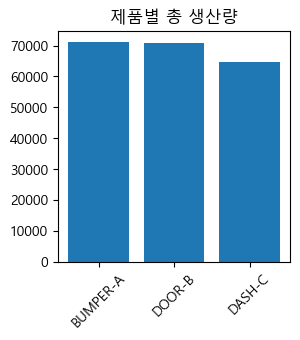

In [74]:
plt.figure(figsize=(3, 3))
plt.bar(prod_quantity.index, prod_quantity.values)

# 2. 제목: '제품별 총 생산량'
plt.title('제품별 총 생산량')
# 3. x축 레이블 45도 회전
plt.xticks(rotation=45)

plt.show()

---
## 문제 2: 일별 불량률 추이 선 그래프 (15점)

**요구사항**:
1. 일별 평균 불량률 집계 (처음 30일)
2. 제목: '일별 평균 불량률 추이 (30일)'
3. x축 레이블 45도 회전

**힌트**: `groupby()`, `head(30)`

In [ ]:
# 1. 일별 평균 불량률 집계 (처음 30일)
first_30_defect = production_df.groupby('production_date')['defect_rate'].mean().round(2).iloc[:30,]
first_30_defect

production_date
2024-01-01    5.59
2024-01-02    5.41
2024-01-03    5.29
2024-01-04    5.42
2024-01-05    5.25
2024-01-06    5.59
2024-01-07    5.26
2024-01-08    5.20
2024-01-09    5.21
2024-01-10    5.13
2024-01-11    5.26
2024-01-12    5.44
2024-01-13    5.16
2024-01-14    5.37
2024-01-15    5.39
2024-01-16    5.16
2024-01-17    5.29
2024-01-18    5.20
2024-01-19    5.41
2024-01-20    5.26
2024-01-21    5.13
2024-01-22    5.35
2024-01-23    5.54
2024-01-24    5.30
2024-01-25    5.21
2024-01-26    5.43
2024-01-27    5.24
2024-01-28    5.29
2024-01-29    5.30
2024-01-30    5.11
Name: defect_rate, dtype: float64

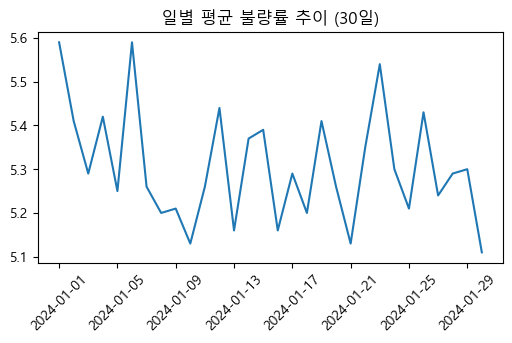

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(first_30_defect)

# 2. 제목: '일별 평균 불량률 추이 (30일)'
plt.title('일별 평균 불량률 추이 (30일)')
# 3. x축 레이블 45도 회전
plt.xticks(rotation=45)
plt.show()

---
## 문제 3: 설비별 평균 사이클 타임 가로 bar 그래프 (10점)

**요구사항**:
1. 설비별 평균 사이클 타임 집계
2. 사이클 타임 내림차순 정렬 (상위 10개)
3. 가로 그래프 생성
4. 제목: '설비별 평균 사이클 타임 (상위 10개)'
5. x축 격자 추가



In [35]:
# 1. 설비별 평균 사이클 타임 집계
# 2. 사이클 타임 내림차순 정렬 (상위 10개)
eq_ct = production_df.groupby('equipment_id')['cycle_time'].mean().round(2).sort_values(ascending=False).nlargest(10)
eq_ct

equipment_id
ASM-001      94.43
INJ-002      77.83
PRESS-001    73.57
PRESS-002    72.56
INJ-001      71.71
Name: cycle_time, dtype: float64

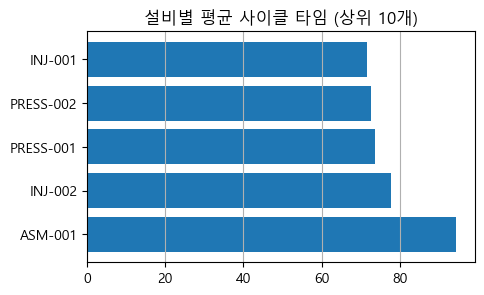

In [174]:
# 3. 가로 그래프 생성
plt.figure(figsize=(5, 3))
plt.barh(eq_ct.index, eq_ct.values)

# 4. 제목: '설비별 평균 사이클 타임 (상위 10개)'
plt.title('설비별 평균 사이클 타임 (상위 10개)')
# 5. x축 격자 추가
plt.grid(axis='x')

plt.show()

---
## 문제 4: 사이클 타임 분포 그리기 (15점)

**요구사항**:
1. 사이클 타임 (bins=40)
2. 막대 색상: 'lightgreen', 테두리: 'black'
3. 평균값을 빨간 점선으로 표시 (linewidth=2)
4. 중앙값을 파란 점선으로 표시 (linewidth=2)
5. 제목: '사이클 타임 분포'
6. 범례 추가 (평균: XX초, 중앙값: XX초)
7. y축 격자 추가

**힌트**: `plt.axvline()`

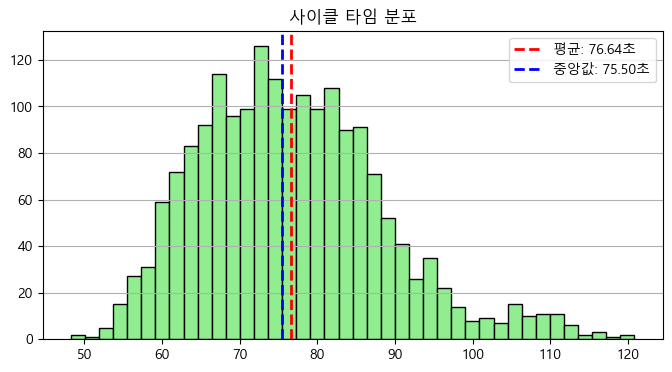

In [172]:
ct_mean = production_df['cycle_time'].mean()
ct_mid = production_df['cycle_time'].median()

plt.figure(figsize=(8, 4))

# 1. 사이클 타임 (bins=40)
# 2. 막대 색상: 'lightgreen', 테두리: 'black'
plt.hist(production_df['cycle_time'], bins=40,
         color='lightgreen', edgecolor='black')

# 3. 평균값을 빨간 점선으로 표시 (linewidth=2)
plt.axvline(ct_mean, label=f"평균: {ct_mean:.2f}초",
            color='red', linestyle='--', linewidth=2)
# 4. 중앙값을 파란 점선으로 표시 (linewidth=2)
plt.axvline(ct_mid, label=f"중앙값: {ct_mid:.2f}초",
            color='blue', linestyle='--', linewidth=2)

# 5. 제목: '사이클 타임 분포'
plt.title('사이클 타임 분포')
# 6. 범례 추가 (평균: XX초, 중앙값: XX초)
plt.legend()
# 7. y축 격자 추가
plt.grid(axis='y')

plt.show()

---
## 문제 5: 생산량 vs 사이클 타임 차트 (15점)

**요구사항**:
1. 실제 생산량(x축) vs 사이클 타임(y축) 
2. 교대조별로 색상 구분 (for loop 사용)
3. 제목: '생산량 vs 사이클 타임 (교대조별)'
4. 범례 추가

**힌트**: `for shift in df['shift'].unique()`

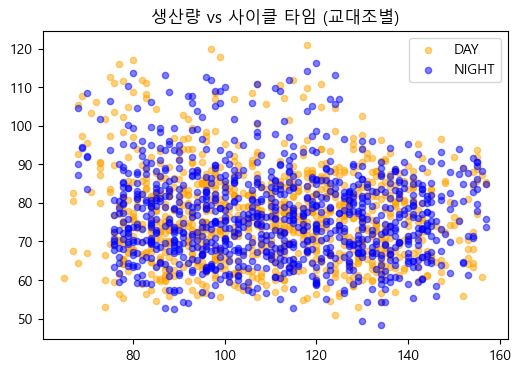

In [169]:
plt.figure(figsize=(6, 4))

# 1. 실제 생산량(x축) vs 사이클 타임(y축) 
# 2. 교대조별로 색상 구분 (for loop 사용)
color_dict = {'DAY':'orange', 'NIGHT':'blue'}

for shift in production_df['shift'].unique():
    shift_df = production_df[production_df['shift'] == shift]
    plt.scatter(shift_df['actual_quantity'], shift_df['cycle_time'],
                color=color_dict[shift], label=shift, alpha=0.5, s=20)

# 3. 제목: '생산량 vs 사이클 타임 (교대조별)'
plt.title('생산량 vs 사이클 타임 (교대조별)')
# 4. 범례 추가
plt.legend()

plt.show()

In [ ]:
production_df.loc[production_df['shift'] == 'DAY', ['actual_quantity', 'cycle_time']].corr()
# 거의 관계가 없다

,actual_quantity,cycle_time
actual_quantity,1.000000,-0.080823
cycle_time,-0.080823,1.000000


In [ ]:
production_df.loc[production_df['shift'] == 'NIGHT', ['actual_quantity', 'cycle_time']].corr()
# 거의 관계가 없다

,actual_quantity,cycle_time
actual_quantity,1.000000,-0.090014
cycle_time,-0.090014,1.000000


---
## 문제 6: 제품별 생산 비율 차트 (10점)

**요구사항**:
1. 제품별 생산 건수 집계
2. 차트 생성 : 퍼센트 표시 
3. 제목: '제품별 생산 건수 비율'
4. Figure 크기: (8, 8)



In [130]:
# 1. 제품별 생산 건수 집계
prod_count = production_df['product_code'].value_counts()
prod_count

product_code
BUMPER-A    648
DOOR-B      641
DASH-C      583
Name: count, dtype: int64

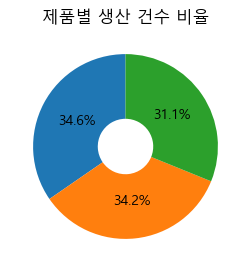

In [138]:
# 4. Figure 크기: (8, 8)
# plt.figure(figsize=(8, 8))
plt.figure(figsize=(3, 3))
# 2. 차트 생성 : 퍼센트 표시 
plt.pie(prod_count, startangle=90, autopct='%.1f%%',
        wedgeprops={'width':0.7})

# 3. 제목: '제품별 생산 건수 비율'
plt.title('제품별 생산 건수 비율')

plt.show()

---
## 문제 7: 교대조별 일별 생산량 비교 선 그래프 (15점)

**요구사항**:
1. 교대조-날짜별 총 생산량 집계 (처음 30일)
2. 주간조와 야간조를 각각 다른 선으로 표시:
   - 주간조: 파란색, 마커 'o'
   - 야간조: 주황색, 마커 's'
3. 선 굵기: 2, 마커 크기: 4
4. 제목: '교대조별 일별 생산량 비교 (30일)'
5. 범례 추가
6. 격자 추가
7. x축 레이블 45도 회전



In [146]:
# 1. 교대조-날짜별 총 생산량 집계 (처음 30일)
end_date = production_df['production_date'].iloc[0,] + pd.Timedelta(days=30)
shift_date_quantity = production_df[production_df['production_date'] < end_date].groupby(['shift', 'production_date'])['actual_quantity'].sum()

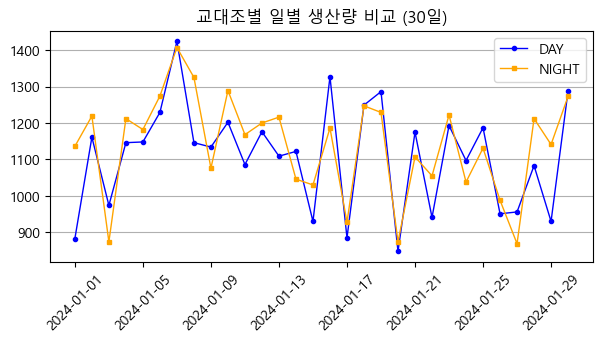

In [161]:
plt.figure(figsize=(7, 3))
# 2. 주간조와 야간조를 각각 다른 선으로 표시:
#    - 주간조: 파란색, 마커 'o'
#    - 야간조: 주황색, 마커 's'
# 3. 선 굵기: 2, 마커 크기: 4
# plt.plot(shift_date_quantity['DAY'], label='DAY', color='blue', marker='o', linewidth=2, markersize=4)
# plt.plot(shift_date_quantity['NIGHT'], label='NIGHT', color='orange', marker='s', linewidth=2, markersize=4)
plt.plot(shift_date_quantity['DAY'], label='DAY', color='blue', marker='o', linewidth=1, markersize=3)
plt.plot(shift_date_quantity['NIGHT'], label='NIGHT', color='orange', marker='s', linewidth=1, markersize=3)

# 4. 제목: '교대조별 일별 생산량 비교 (30일)'
plt.title('교대조별 일별 생산량 비교 (30일)')
# 5. 범례 추가
plt.legend()
# 6. 격자 추가
plt.grid(axis='y')
# 7. x축 레이블 45도 회전
plt.xticks(rotation=45)

plt.show()

### 데이터 특성에 맞는 차트 선택 방법

* 기본 차트: 선, 막대, 산점도, 히스토그램, 파이
* 차트 스타일링: 색상, 선, 마커
* 차트 제목, 축, 레이블, 범례, 격자

### 용도에 따른 그래프 종류

* 시간에 따른 변화 -> 선 그래프
* 항목 간에 비교하고 싶을 때 -> 막대 그래프
* 두 변수의 관계 -> 산점도
* 상관관계 분석 -> 히트맵
* 데이터의 분포를 파악 -> 히스토그램
* 비율 -> 파이 차트

### 데이터 특성에 맞는 차트 선택 방법

* 기본 차트: 선, 막대, 산점도, 히스토그램, 파이
* 차트 스타일링: 색상, 선, 마커
* 차트 제목, 축, 레이블, 범례, 격자

### 용도에 따른 그래프 종류

* 시간에 따른 변화 -> 선 그래프
* 항목 간에 비교하고 싶을 때 -> 막대 그래프
* 두 변수의 관계 -> 산점도
* 상관관계 분석 -> 히트맵
* 데이터의 분포를 파악 -> 히스토그램
* 비율 -> 파이 차트

### 데이터 특성에 맞는 차트 선택 방법

* 기본 차트: 선, 막대, 산점도, 히스토그램, 파이
* 차트 스타일링: 색상, 선, 마커
* 차트 제목, 축, 레이블, 범례, 격자

### 용도에 따른 그래프 종류

* 시간에 따른 변화 -> 선 그래프
* 항목 간에 비교하고 싶을 때 -> 막대 그래프
* 두 변수의 관계 -> 산점도
* 상관관계 분석 -> 히트맵
* 데이터의 분포를 파악 -> 히스토그램
* 비율 -> 파이 차트

---
## 문제 8: 설비 생산 현황 2x1 subplot (20점)

**요구사항**:
설비별 생산 현황을 2개의 subplot으로 구성:

1. **상단 [0]**: 설비별 총 생산량 막대 그래프 (상위 10개)
   - 막대 색상: 'steelblue', 테두리: 'black'
   - 제목: '설비별 총 생산량'
   - x축 레이블 45도 회전
   - y축 격자

2. **하단 [1]**: 설비별 평균 불량률 막대 그래프 (상위 10개)
   - 막대 색상: 'coral', 테두리: 'black'
   - 제목: '설비별 평균 불량률'
   - x축 레이블 45도 회전
   - y축 격자

3. Figure 크기: (12, 10)
4. `plt.tight_layout()` 적용

**힌트**: `fig, axes = plt.subplots(2, 1)`, `axes[0]`, `axes[1]`

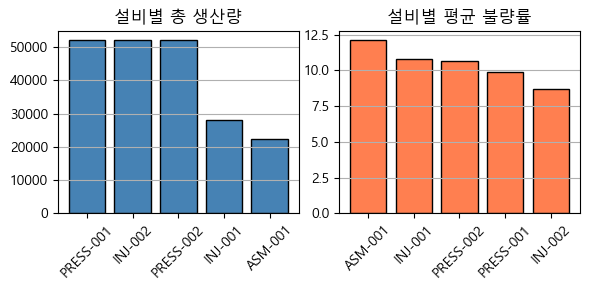

In [158]:
# 3. Figure 크기: (12, 10)
# fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# 1. **상단 [0]**: 설비별 총 생산량 막대 그래프 (상위 10개)
#    - 막대 색상: 'steelblue', 테두리: 'black'
#    - 제목: '설비별 총 생산량'
#    - x축 레이블 45도 회전
#    - y축 격자
eq_quantity = production_df.groupby('equipment_id')['actual_quantity'].sum().nlargest(10)

axes[0].bar(eq_quantity.index, eq_quantity.values,
            color='steelblue', edgecolor='black')

axes[0].set_title('설비별 총 생산량')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

# 2. **하단 [1]**: 설비별 평균 불량률 막대 그래프 (상위 10개)
#    - 막대 색상: 'coral', 테두리: 'black'
#    - 제목: '설비별 평균 불량률'
#    - x축 레이블 45도 회전
#    - y축 격자
eq_defect = production_df.groupby('equipment_id')['defect_rate'].mean().nlargest(10)

axes[1].bar(eq_defect.index, eq_defect.values,
            color='coral', edgecolor='black')

axes[1].set_title('설비별 평균 불량률')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

# 4. `plt.tight_layout()` 적용
plt.tight_layout()
plt.show()

---
## 수고하셨습니다!

### 학습 체크리스트
- [ ] 선 그래프 그리기 및 스타일링
- [ ] 막대 그래프 (세로/가로)
- [ ] 산점도 및 색상 구분
- [ ] 히스토그램 및 통계선 표시
- [ ] 파이 차트
- [ ] 여러 선 그래프 함께 표시
- [ ] Subplot으로 다중 차트 구성
- [ ] 제목, 레이블, 범례, 격자 추가
